* TODO mean intensity plot remove cluster all
* TODO check mean intensity plot same as R plots? Same p-values? (might need to adapt python mixed model)
* TODO rerun SBF2 feature plots

# Extract intensity and spatial features from ICLs

Extract features for all experiments with
```
scripts/extract_features.sh
```

To extract a csv of mean intensity and size features and other metadata columns, execute the following code:

In [1]:
from miann.tl import Experiment, FeatureExtractor
import os

exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')
for data_dir in exp.data_params['data_dirs']:
    # clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])

    # annotated clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])

In [2]:
from miann.tl import Experiment, FeatureExtractor
import os

# SBF2 data
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')
for data_dir in exp.data_params['data_dirs']:
    # clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed1.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'siRNA', 'TR', 'cell_cycle'])

    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed2.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'siRNA', 'TR', 'cell_cycle'])

    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'siRNA', 'TR', 'cell_cycle'])

    # annotated clusters
    #extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad'))
    #extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])


In [8]:
exp.data_params['data_dirs']

['HeLa_SBF2/K18',
 'HeLa_SBF2/L19',
 'HeLa_SBF2/M18',
 'HeLa_scrambled/K19',
 'HeLa_scrambled/L18',
 'HeLa_scrambled/M19']

# Explore features

In [4]:
from miann.tl import Experiment, FeatureExtractor
import os
from miann.pl import plot_mean_intensity, zscore, get_intensity_change, plot_intensity_change, plot_mean_size, plot_size_change
import anndata as ad
from miann.utils import init_logging
import logging
init_logging(level=logging.WARNING)

## VAE_all/CondVAE_pert-CC

In [2]:
exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')

### clustering_res0.5

In [3]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

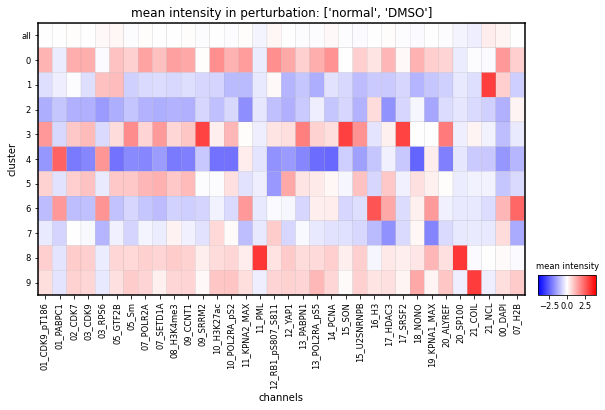

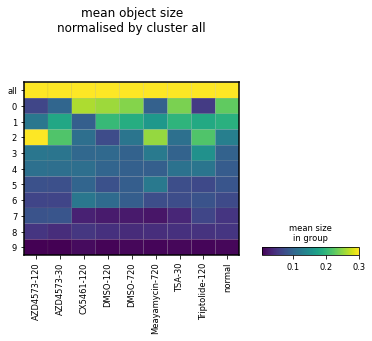

In [4]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'perturbation':['normal', 'DMSO']}, dendrogram=False, layer=None, 
    standard_scale='var', cmap='bwr', vmin=-4, vmax=4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='perturbation_duration', normby_row='all', vmax=0.3)

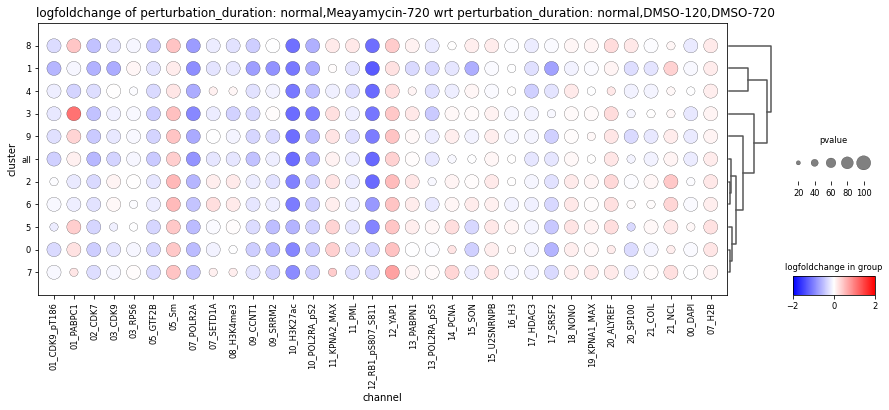

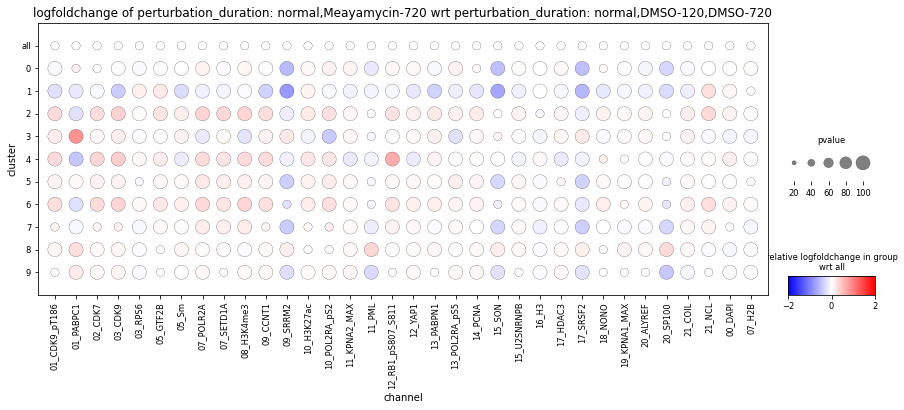

In [11]:
res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

### clustering_res0.5 annotation

In [12]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

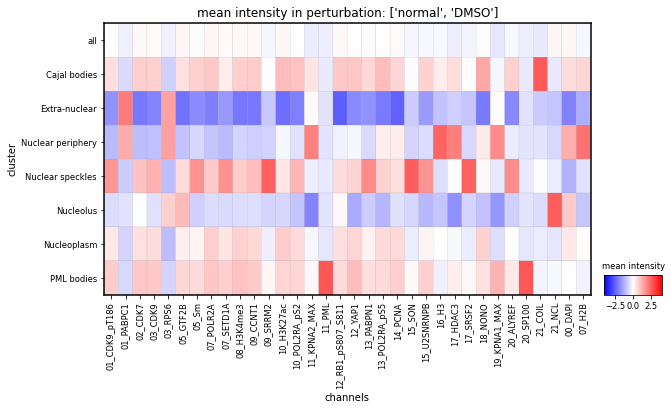

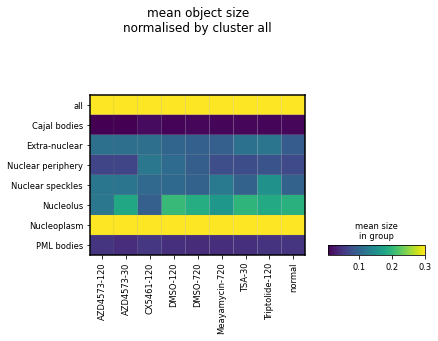

In [13]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'perturbation':['normal', 'DMSO']}, dendrogram=False, layer=None, 
    standard_scale='var', cmap='bwr', vmin=-4, vmax=4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='perturbation_duration', normby_row='all', vmax=0.3)

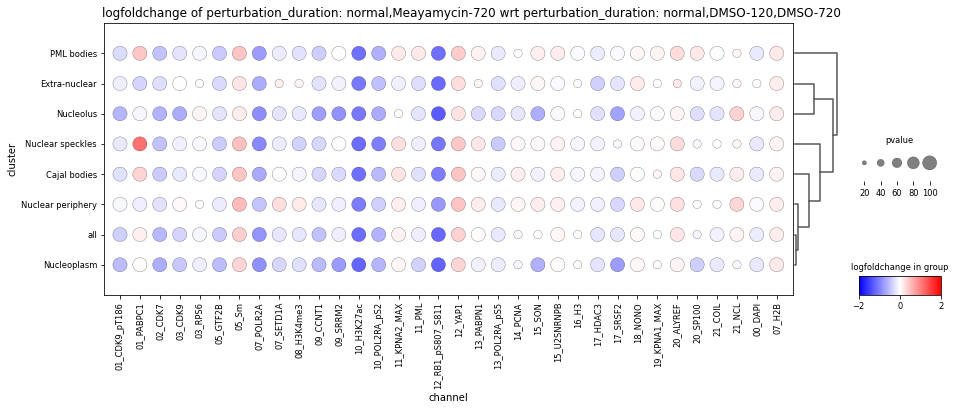

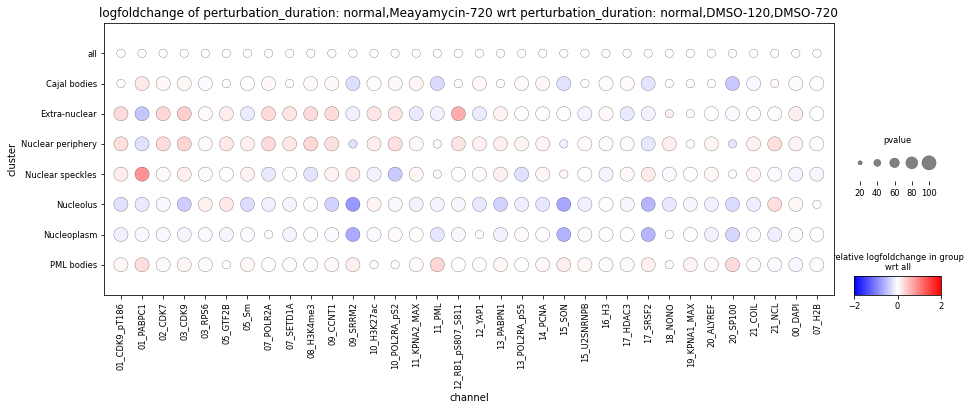

In [14]:
res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

## VAE_SBF2/CondVAE_siRNA-CC

In [32]:
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')

INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC


### clustering_res0.9_sub-0.33_seed1

In [33]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed1.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')
zscore(adata, limit_to_groups={'siRNA':'scrambled'})

INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC


In [7]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'siRNA':'scrambled'}, dendrogram=True, layer=None, standard_scale='var')

ValueError: The number of observations cannot be determined on an empty distance matrix.

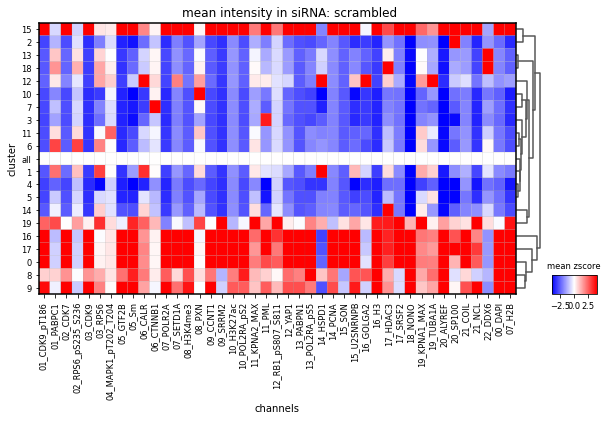

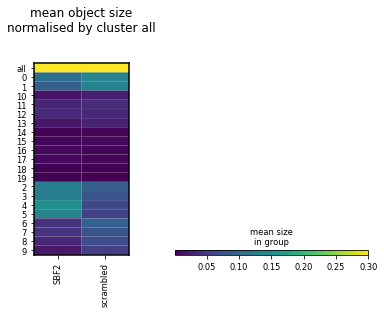

In [39]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'siRNA':'scrambled'}, dendrogram=True, layer='zscored', cmap='bwr', vmax=4, vmin=-4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='siRNA', normby_row='all', vmax=0.3)

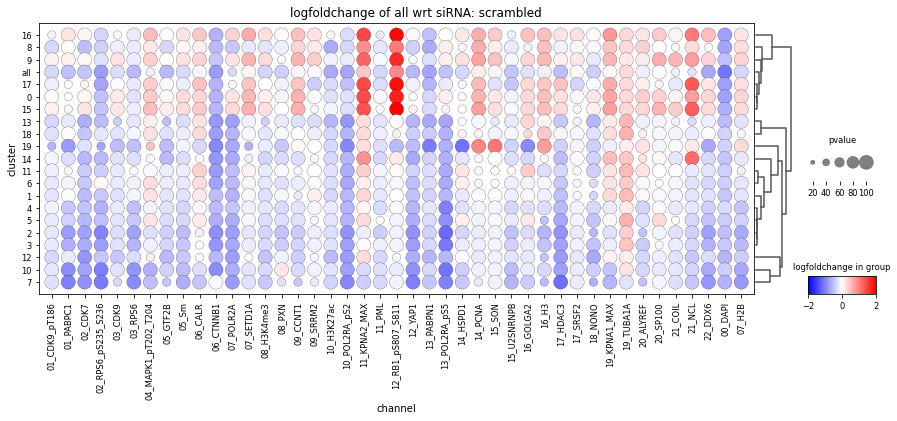

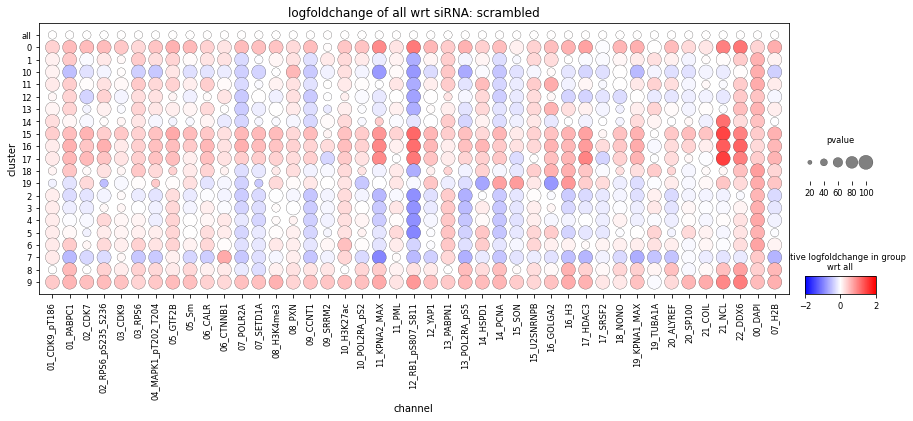

In [5]:
res = get_intensity_change(adata, groupby='cluster', reference_group='siRNA', reference='scrambled', color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='siRNA', reference='scrambled', color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

### clustering_res0.9_sub-0.33_seed1 annotation

In [6]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed1_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')
zscore(adata, limit_to_groups={'siRNA':'scrambled'})

INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Setting up experiment VAE_SBF2/CondVAE_siRNA-CC
INFO:Experiment:Initialised from existing experiment in VAE_SBF2/CondVAE_siRNA-CC


In [19]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'siRNA':'scrambled'}, dendrogram=True, layer='zscored', cmap='bwr', vmin=-10, vmax=10)
plot_mean_size(adata, groupby_row='cluster', groupby_col='siRNA', normby_row='all', vmax=0.3)

In [24]:
res = get_intensity_change(adata, groupby='cluster', reference_group='siRNA', reference='scrambled', color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='siRNA', reference='scrambled', color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

{'data_dir': '184A1_SBF2/K18',
 'cluster_name': 'clustering_res0.9_sub-0.33_seed1',
 'cluster_dir': 'aggregated/sub-0.005_sub-0.33',
 'cluster_col': 'annotation',
 'exp_name': 'VAE_SBF2/CondVAE_siRNA-CC'}